In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
if not os.path.exists("figures"):
    os.mkdir("figures")
figure_path = lambda file_name: os.path.join("figures", file_name)

In [4]:
data = pd.read_pickle("splitted_samples.data")
data.head()

,patient,beat_type,beat_position,waves
0,0,N,189,"[[-0.0004107794277811361, -0.00261239189352849..."
1,0,N,425,"[[-0.00045817705406357484, -0.0030930819806448..."
2,0,N,659,"[[-0.0007267636029973947, -0.00525875376475549..."
3,0,N,889,"[[-0.0006793659767149558, -0.00501505180905132..."
4,0,N,1113,"[[-0.0009953501519312145, -0.00744022475762694..."


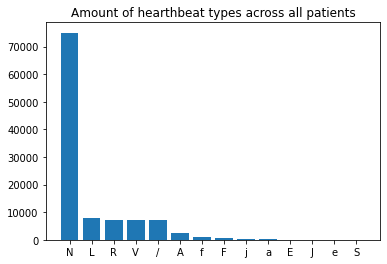

In [5]:
beat_type_counts = data["beat_type"].value_counts()
plt.bar(beat_type_counts.index, beat_type_counts.values)
plt.title("Amount of hearthbeat types across all patients")
plt.savefig(figure_path("heartbeat_types.png"))
plt.show()

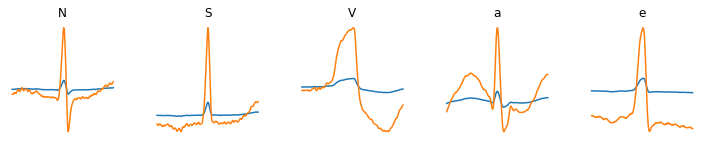

In [27]:
hearthbeats = data.groupby(["beat_type"]).first().reset_index()
hearthbeats = hearthbeats[hearthbeats["waves"].str.len() == 160].reset_index().iloc[6:11].reset_index()

plt.figure(figsize=(10,10))
for i, beat in hearthbeats.iterrows():
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.axis('off')
    plt.title(beat["beat_type"])
    plt.plot(beat["waves"])
plt.savefig("figures/heartbeats.png")

In [11]:
hearthbeats

,beat_type,patient,beat_position,waves
0,/,13,136,"[[-0.0007899604380406463, -0.00639471575541610..."
1,A,0,19148,"[[-0.0005371730978676395, -0.00371517442654957..."
2,E,3,590585,"[[0.0002527873401730068, 0.002521549241258406]..."
3,F,4,21791,"[[-0.0005213738891068266, -0.00452922893776091..."
4,J,16,89347,"[[-0.0006319683504325171, -0.00534012136873642..."
5,L,3,13717,"[[-0.0005687715153892654, -0.00434635225692312..."
6,N,0,189,"[[-0.0004107794277811361, -0.00261239189352849..."
8,S,9,385263,"[[-0.0006161691416717042, -0.00421087320236778..."
9,V,0,282126,"[[-0.00042657863654194903, -0.0028568843692916..."
10,a,4,536010,"[[-0.0009321533168879626, -0.00643065643705282..."
